# PRISM daily US weather

<b>Table of Contents</b>

- Overview
- Setup
    - Get authentication token
- Data layers
- Querying the data layers
    - Point query
    - Raster query
- References
  
## Overview

The PRISM daily US weather dataset refers to daily climate data produced by the PRISM Climate Group at Oregon State University. PRISM (Parameter-elevation Regressions on Independent Slopes Model) is a climate mapping system that uses statistical techniques to incorporate spatial patterns like elevation, proximity to water, and terrain features to provide high-resolution climate data primarily for the United States. Let's get a practical understanding about this dataset and its usage through this tutorial.

## Setup

Before starting, you have to install IBM EI Geospatial python SDK i.e ibmpairs and other modules needed to run this sample ,mentioned in the cell below.

<b>Note:</b> To run this notebook seamlessly, you have to first configure your Geospatial APIs' credentials in a file named `secrets.ini` in the below format:

```
[EI]
api.api_key = <Your Geospatial APIs API key>
api.tenant_id = <Your Geospatial APIs Tenant ID>
api.org_id = <Your Geospatial APIs Org ID>
```

Keep the secrets.ini file at an appropriate relative location of this notebook. For example, as specified in the below config.

```config.read('../../../../auth/secrets.ini')```

In [ ]:
%pip install ibmpairs
%pip install configparser
%pip install matplotlib

In [1]:
import ibmpairs.client as client
import ibmpairs.catalog as catalog
import ibmpairs.query as query
import pandas as pd
import configparser
import json
import numpy as np
from PIL import Image as PIL_Image
from IPython.display import Image, display
import matplotlib.pyplot as plt
import os

Now, let us create a client object using the API_KEY, TENANT_ID (or CLIENT_ID) and ORG_ID to create an authenticated HTTP client Authentication token using 'ibmpairs.client' module, to use it in the subsequent steps.

### Get Authentication Token

In [4]:
config = configparser.RawConfigParser()
config.read('../../../../auth/secrets.ini')
# Best practice is not to include secrets in source code so we read
# an api key, tenant id and org id from a secrets.ini file.
# You could set the credentials in-line here but we don't
# recommend it for security reasons.

EI_API_KEY    = config.get('EI', 'api.api_key')
EI_TENANT_ID  = config.get('EI', 'api.tenant_id') 
EI_ORG_ID     = config.get('EI', 'api.org_id')  

EI_client_v3  = client.get_client(api_key   = EI_API_KEY,
                                    tenant_id = EI_TENANT_ID,
                                    org_id    = EI_ORG_ID,
                                    legacy    = False,
                                    version   = 3
                                   )

2025-01-20 17:32:51 - paw - INFO - The client authentication method is assumed to be OAuth2.
2025-01-20 17:32:51 - paw - INFO - Legacy Environment is False
2025-01-20 17:32:51 - paw - INFO - The authentication api key type is assumed to be IBM EIS, because the api key prefix 'PHX' is present.
2025-01-20 17:32:53 - paw - INFO - Authentication success.
2025-01-20 17:32:53 - paw - INFO - HOST: https://api.ibm.com/geospatial/run/na/core/v3


## Data layers
Let us start by querying the catalog to retrieve the dataset_id and the datalayer that form the dataset.

In [5]:
pd.set_option('display.max_colwidth', None)
search_df=catalog.search("PRISM daily")
search_df[['dataset_id','data_layer_id','data_layer_name','data_layer_description_short','data_layer_level','data_layer_type','data_layer_unit','data_set_name','data_set_description_short']]


,dataset_id,data_layer_id,data_layer_name,data_layer_description_short,data_layer_level,data_layer_type,data_layer_unit,data_set_name,data_set_description_short
0,9,91,Daily precipitation,Daily precipitation for the United States.,14,Raster,mm day-1,PRISM daily US weather,Spatial climate data from the Parameter-Elevation Regressions on Independent Slopes Model (PRISM) that can be used to observe short and long-term climate patterns.
1,9,92,Daily maximum temperature,Daily maximum temperature for the United States.,14,Raster,K,PRISM daily US weather,Spatial climate data from the Parameter-Elevation Regressions on Independent Slopes Model (PRISM) that can be used to observe short and long-term climate patterns.
2,9,93,Daily minimum temperature,Daily minimum temperature for the United States.,14,Raster,K,PRISM daily US weather,Spatial climate data from the Parameter-Elevation Regressions on Independent Slopes Model (PRISM) that can be used to observe short and long-term climate patterns.
3,9,94,Daily mean temperature,Daily mean temperature for the United States.,14,Raster,K,PRISM daily US weather,Spatial climate data from the Parameter-Elevation Regressions on Independent Slopes Model (PRISM) that can be used to observe short and long-term climate patterns.


As seen above, the Data Set of ID 9 has four Data Layers. Each of the Data Layers are identified by a unique Data Layer ID. To gain a better understanding of the Data Set and its geospatial and temporal coverage as well as other relevant metadata, we can make further queries to the catalog submodule as mentioned in the [tutorials](https://ibm.github.io/ibmpairs/tutorials/quickstart/quickstartcatalog.html).

## Querying the Data Layers

### Point query
Next, let us make a point query for locations in different parts of the USA to observe their climate values.

In [7]:
query_result = query.submit(
    {
    "name": "prism_daily_prs_raster_point",
    "layers": [
        { 
            "type": "raster", 
            "id": 91
        },
        { 
            "type": "raster",
            "id": 92
        }, 
        { 
            "type": "raster", 
            "id": 93
        }, 
        { 
            "type": "raster",
            "id": 94
        },
    ],
    "spatial": {
        "type": "point",
        "coordinates": [
            "41.61290189882822", "-73.4692362092415",           # New Milford
            "41.3876084937045", "-73.09681907943585",           # Bridgeport
            "40.706310645351344", "-72.99072388655307"          # Long Island
        ]
    },
    "temporal": {
        "intervals": [{
                "start": "2024-12-20T00:00:00Z",
                "end": "2024-12-21T00:00:00Z"
            }
        ]
    }
} , client=EI_client_v3)

point_df = query_result.point_data_as_dataframe()
point_df['datetime'] = pd.to_datetime(point_df['timestamp'] , unit='ms', errors = 'coerce')
point_df['datetime'] = point_df['datetime'].dt.strftime('%Y-%m-%dT%H:%M:%SZ')
point_df = point_df.drop(columns=['timestamp'])
point_df

2025-01-20 17:36:29 - paw - INFO - TASK: submit STARTING.
2025-01-20 17:36:34 - paw - INFO - TASK: submit COMPLETED.


,layer_id,layer_name,dataset,longitude,latitude,value,datetime
0,91,Daily precipitation,PRISM daily US weather,-72.990724,40.706311,3.6088547706604004,2024-12-20T12:00:00Z
1,91,Daily precipitation,PRISM daily US weather,-73.096819,41.387608,1.6294467449188232,2024-12-20T12:00:00Z
2,91,Daily precipitation,PRISM daily US weather,-73.469236,41.612902,1.6219682693481445,2024-12-20T12:00:00Z
3,92,Daily maximum temperature,PRISM daily US weather,-72.990724,40.706311,277.0857849121094,2024-12-20T12:00:00Z
4,92,Daily maximum temperature,PRISM daily US weather,-73.096819,41.387608,273.4748840332031,2024-12-20T12:00:00Z
5,92,Daily maximum temperature,PRISM daily US weather,-73.469236,41.612902,272.85003662109375,2024-12-20T12:00:00Z
6,93,Daily minimum temperature,PRISM daily US weather,-72.990724,40.706311,272.05084228515625,2024-12-20T12:00:00Z
7,93,Daily minimum temperature,PRISM daily US weather,-73.096819,41.387608,270.4554443359375,2024-12-20T12:00:00Z
8,93,Daily minimum temperature,PRISM daily US weather,-73.469236,41.612902,268.5357971191406,2024-12-20T12:00:00Z
9,94,Daily mean temperature,PRISM daily US weather,-72.990724,40.706311,274.55517578125,2024-12-20T12:00:00Z


We see above, various climatic values for the different locations we queried for in different units for one day. For instance, the location we queried within Long Island has the daily precipitation value of 3.06528 measured in Milli Meters per day (mm - day) as of the date queried for. Similarly daily maximum temperature, daily minimum temperature and daily mean temperature values are being presented as 277.0857849121094, 272.05084228515625 and 274.55517578125 respectively which is measured in Kelvin (K).

### Raster query
Next, let us make a raster query for the area comprising of part of Connecticut, USA, to observe the change in climatic paramters in different parts.

In [9]:
prismDailyResult = query.submit_check_status_and_download(
    {
        "publish": True,
        "name": "Prism Daily data for a part of Connecticut",
        "spatial": {
            "type": "square",
            "coordinates": [
                41.5481,-75.4805,
                44.1202,-71.5457
            ]
        },
        "temporal": {
            "intervals": [
              {
                "start": "2024-12-20T00:00:00Z",
                "end": "2024-12-21T00:00:00Z"
              }
            ]
        },
        "layers": [
            {
              "type": "raster",
              "id": "91",
              "output": True
            },
            {
              "type": "raster",
              "id": "92",
              "output": True
            },
            {
              "type": "raster",
              "id": "93",
              "output": True
            },
            {
              "type": "raster",
              "id": "94",
              "output": True
            }
        ]
    }, client=EI_client_v3)

2025-01-20 17:41:47 - paw - INFO - TASK: submit_check_status_and_download STARTING.
2025-01-20 17:41:49 - paw - INFO - The query was successfully submitted with the id: 1737374400_00709493.
2025-01-20 17:41:50 - paw - INFO - The query 1737374400_00709493 has the status Initializing.
2025-01-20 17:42:21 - paw - INFO - The query 1737374400_00709493 has the status Succeeded.
2025-01-20 17:42:21 - paw - INFO - The query 1737374400_00709493 was successful after checking the status.
2025-01-20 17:42:52 - paw - INFO - The query 1737374400_00709493 has the status Succeeded.
2025-01-20 17:42:52 - paw - INFO - The query 1737374400_00709493 was successful after checking the status.
2025-01-20 17:42:52 - paw - INFO - The query download folder is set to the path /Users/environmental-intelligence/Environmental-Intelligence-internal-copy/geospatial_analytics/v3_apis/samples/industry_use_cases/datasets/prism-daily-prs/download/.
2025-01-20 17:42:56 - paw - INFO - The query 1737374400_00709493 is a zip

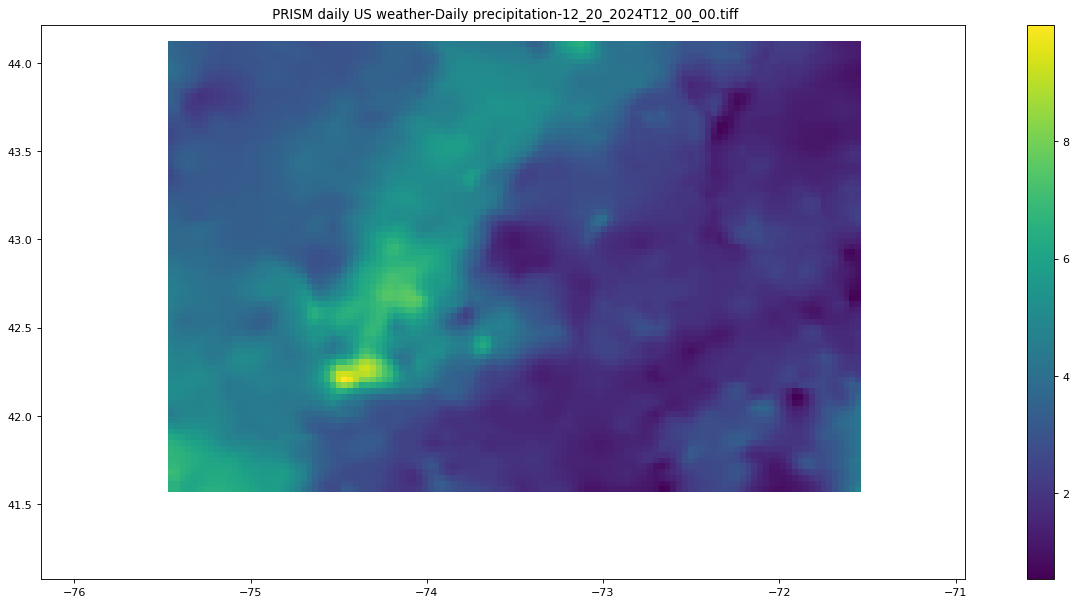

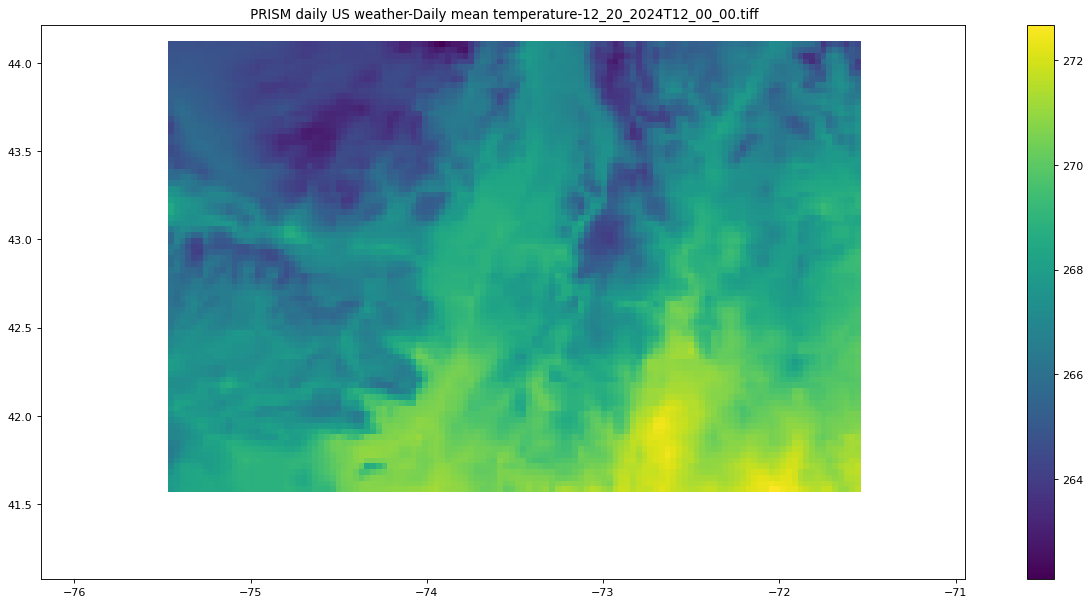

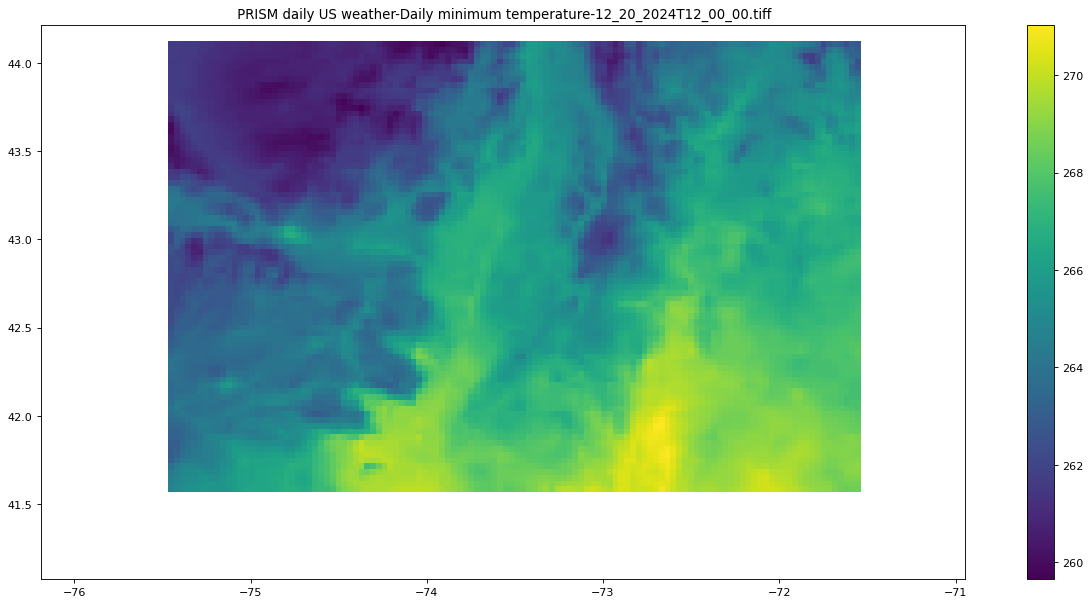

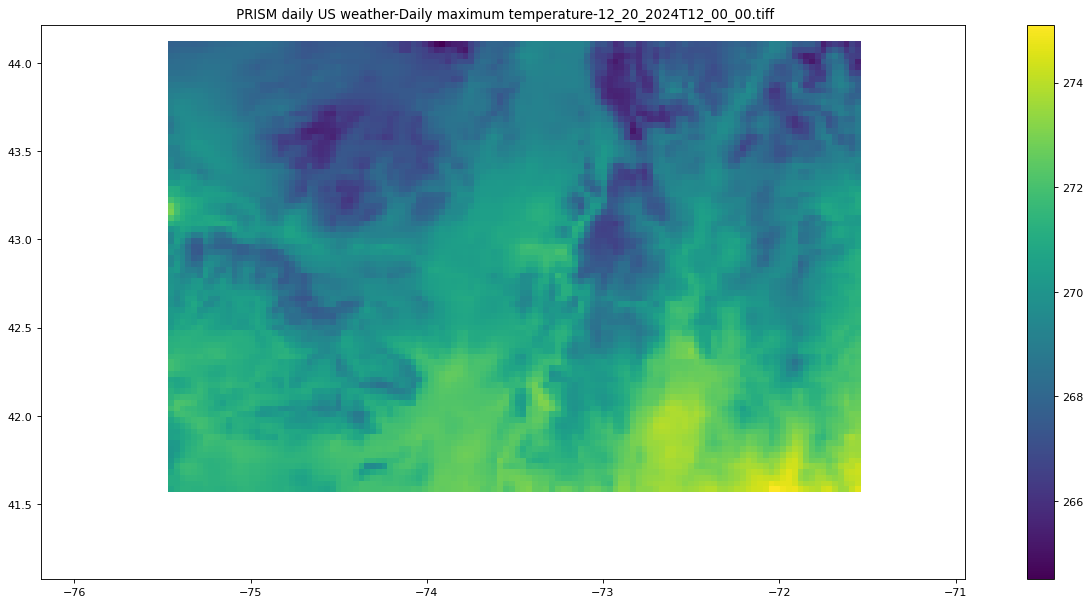

In [10]:
# Function to display the resulting Tiff(s).
prismDailyResult_file_list = prismDailyResult.list_files()
image_list = []
for file in prismDailyResult_file_list:
    if file.endswith('.tiff'): #display the raster images
        with open(file+'.json', 'r') as summary_file:
            fileparms = json.load(summary_file)
        boundingBox=fileparms["boundingBox"]
        pixelStatistics=fileparms["rasterStatistics"]
        myextent=[boundingBox["minLongitude"],
                  boundingBox["maxLongitude"],
                  boundingBox["minLatitude"],
                  boundingBox["maxLatitude" ] ]  
        arrayNED = np.array(PIL_Image.open(file))
        mask = (arrayNED == -9999)
        # Masked array to exclude NO Data points from plotting
        masked_array = np.ma.masked_array(arrayNED, mask)
        plt.figure(figsize = (20, 9), dpi=80) # Sets the size and resolution of the plot
        plt.imshow(masked_array,cmap = 'viridis', 
                   vmin=pixelStatistics["pixelMin"], 
                   vmax=pixelStatistics["pixelMax"],
                   extent = myextent) # Loads the raster data and sets the colormap
        cbar = plt.colorbar() # Adds the color bar
        plt.title(" "+os.path.basename(file)) 
        output_image_path = os.path.splitext(os.path.basename(file))[0] + ".png"
        image_list.append(output_image_path)

        # # Save the figure
        plt.savefig(output_image_path, bbox_inches='tight')
        plt.close() 
for image in image_list:
    display(Image(filename=image))

Each of the images above represent information about different climate variables such as precipitation, mean, min and max temperatures for the specified location and temporal period. The color code scale represents the variation of the values of the above mentioned parameters for the given square with deeper purple denoting lower values and yellow denoting higher values.

### References
- https://climatedataguide.ucar.edu/climate-data/prism-high-resolution-spatial-climate-data-united-states-maxmin-temp-dewpoint
- https://prism.oregonstate.edu